In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2.3, 4.5, 6.1, 8.9, 11.0, 12.9, 15.2, 18.5, 20.0, 21.9])

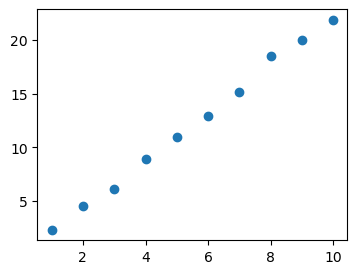

In [4]:
plt.figure(figsize=(4,3))
plt.scatter(X,y)

In [6]:
model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

In [7]:
y_pred = model.predict(X)

In [8]:
y_pred

array([ 2.10181818,  4.33030303,  6.55878788,  8.78727273, 11.01575758,
       13.24424242, 15.47272727, 17.70121212, 19.92969697, 22.15818182])

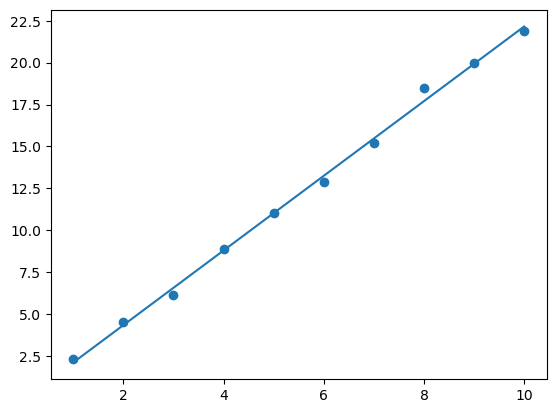

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [10]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

In [11]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.378e+04
Date:                Fri, 10 Jan 2025   Prob (F-statistic):                    1.20e-15
Time:                        11:07:42   Log-Likelihood:                         -3.7052
No. Observations:                  10   AIC:                                      9.410
Df Residuals:                       9   BIC:                                      9.713
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/aayush/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


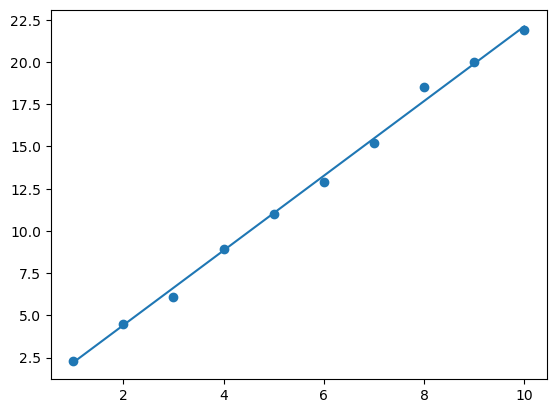

In [12]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)

Variance Inflation Factor (VIF):
    Variable       VIF
0   Constant  9.910762
1  Feature 1  1.010798
2  Feature 2  1.002955
3  Feature 3  1.008145

Regression Performance:
Mean Squared Error (MSE): 201.74
R-squared (R²): 0.99


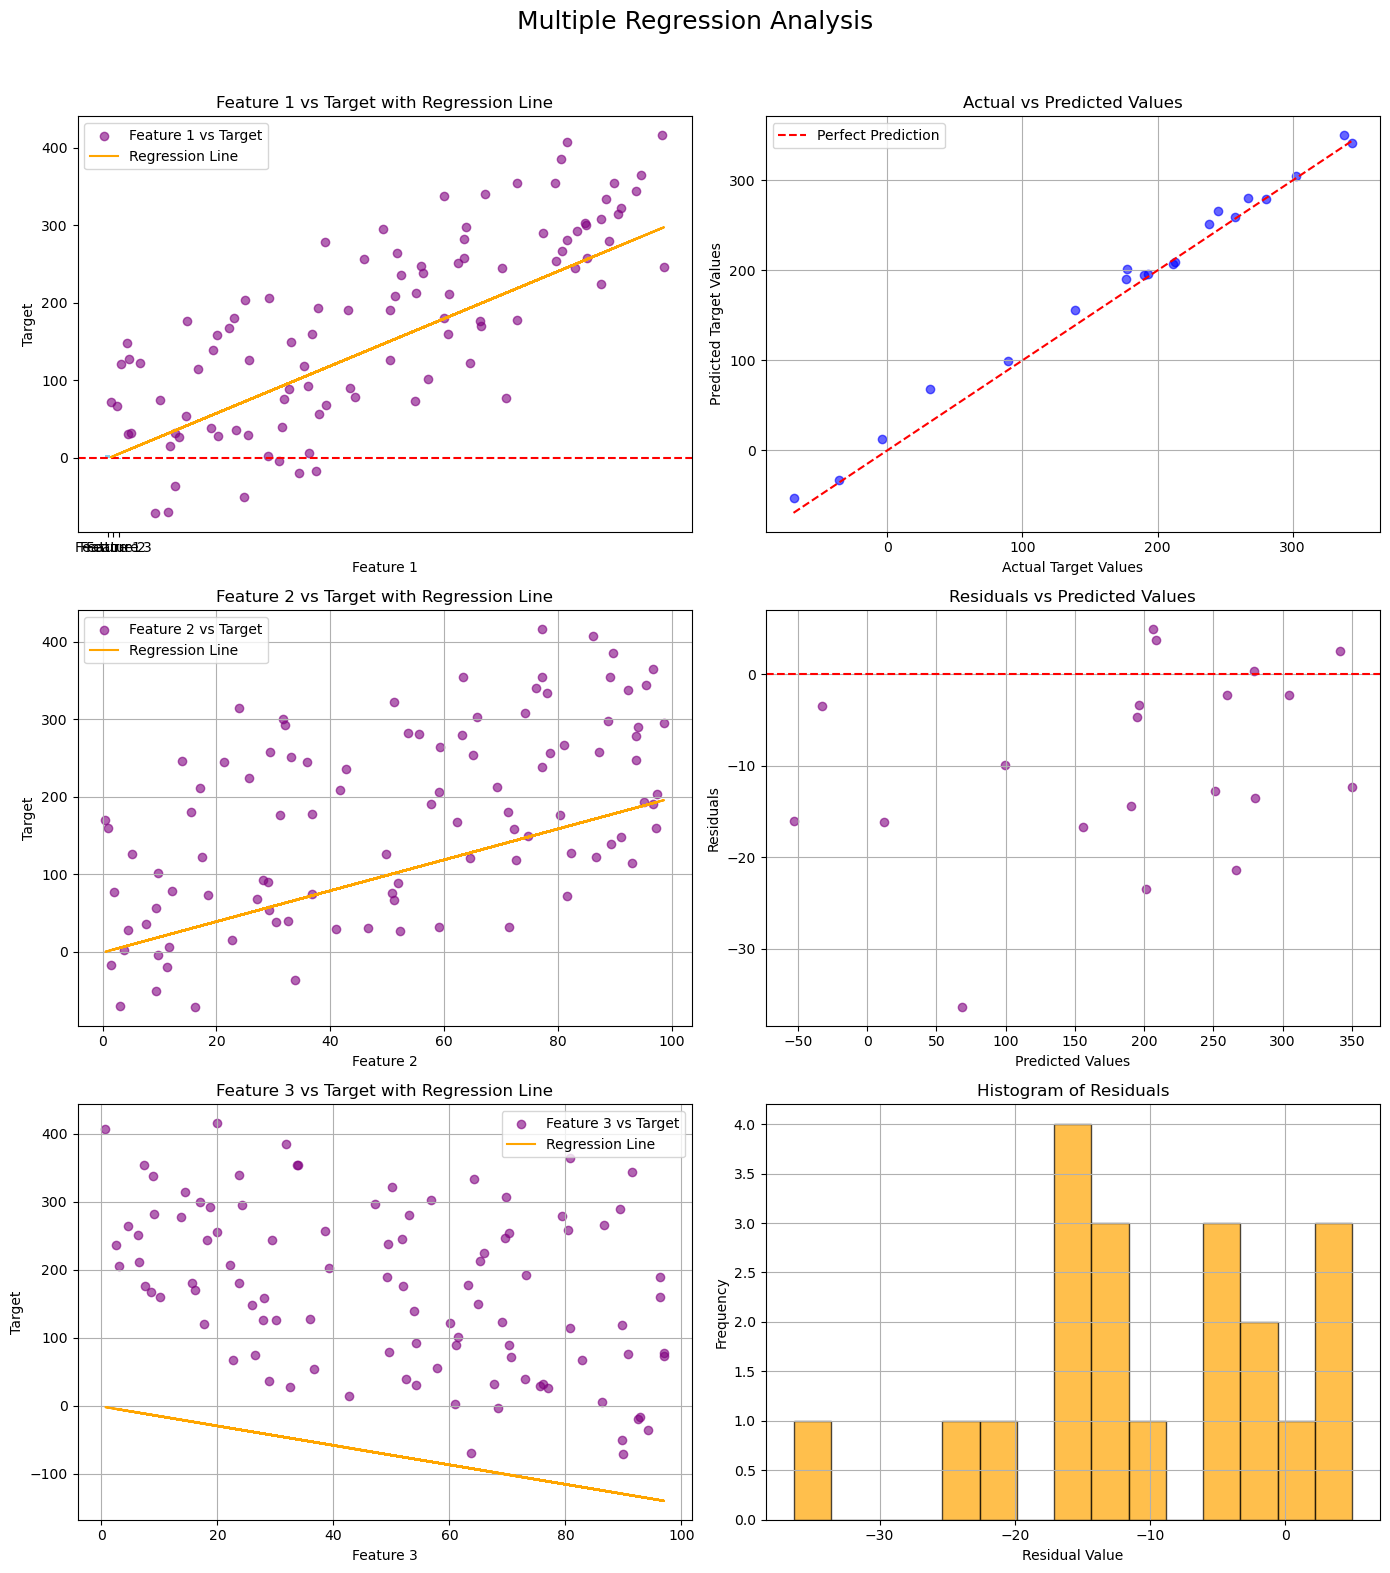

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Generate synthetic dataset
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 3) * 100  # Three features with random values
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(n_samples) * 10  # Target with noise

# Convert to DataFrame for better readability
feature_names = ['Feature 1', 'Feature 2', 'Feature 3']
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Step 2: Calculate VIF
X_const = add_constant(df[feature_names])  # Add constant for VIF calculation
vif = pd.DataFrame({
    'Variable': ['Constant'] + feature_names,
    'VIF': [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

print("Variance Inflation Factor (VIF):")
print(vif)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluate regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nRegression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Visualize in grid layout
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
fig.suptitle('Multiple Regression Analysis', fontsize=18)

# Plot 1: Bar chart of regression coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
axes[0, 0].bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_title('Regression Coefficients')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Coefficient Value')
axes[0, 0].grid()

# Plot 2: Actual vs Predicted Values
axes[0, 1].scatter(y_test, y_pred, color='blue', alpha=0.6)
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
axes[0, 1].set_title('Actual vs Predicted Values')
axes[0, 1].set_xlabel('Actual Target Values')
axes[0, 1].set_ylabel('Predicted Target Values')
axes[0, 1].legend()
axes[0, 1].grid()

# Scatter plots for each feature against Target with regression line
# Scatter plots for each feature against Target with regression line
for i, feature in enumerate(feature_names):
    axes[i, 0].scatter(df[feature], df['Target'], color='purple', alpha=0.6, label=f'{feature} vs Target')
    axes[i, 0].plot(df[feature], model.coef_[i] * df[feature] + model.intercept_, color='orange', label='Regression Line')
    axes[i, 0].set_title(f'{feature} vs Target with Regression Line')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Target')
    axes[i, 0].legend()
    axes[i, 0].grid()



# Plot 3: Residuals vs Predicted Values
residuals = y_test - y_pred
axes[1, 1].scatter(y_pred, residuals, color='purple', alpha=0.6)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Residuals vs Predicted Values')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid()

# Plot 4: Histogram of Residuals
axes[2, 1].hist(residuals, bins=15, color='orange', alpha=0.7, edgecolor='black')
axes[2, 1].set_title('Histogram of Residuals')
axes[2, 1].set_xlabel('Residual Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
